
# Predicting Car Purchase Amount using ANN
**Author** : Sanjoy Kumar

**Notebook used** : Google Colab




# PROBLEM STATEMENT

You are working as a car salesman and you would like to develop a model to predict the total dollar amount that customers are willing to pay given the following attributes: 
- Customer Name
- Customer e-mail
- Country
- Gender
- Age
- Annual Salary 
- Credit Card Debt 
- Net Worth 

The model should predict: 
- Car Purchase Amount 

# Importing the Libraries and Dataset




In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Import Dataset

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Car_Purchasing_Data.csv to Car_Purchasing_Data (2).csv


In [0]:
car_df = pd.read_csv('Car_Purchasing_Data.csv', encoding='ISO-8859-1')

In [0]:
car_df

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


# Visualizing the Dataset

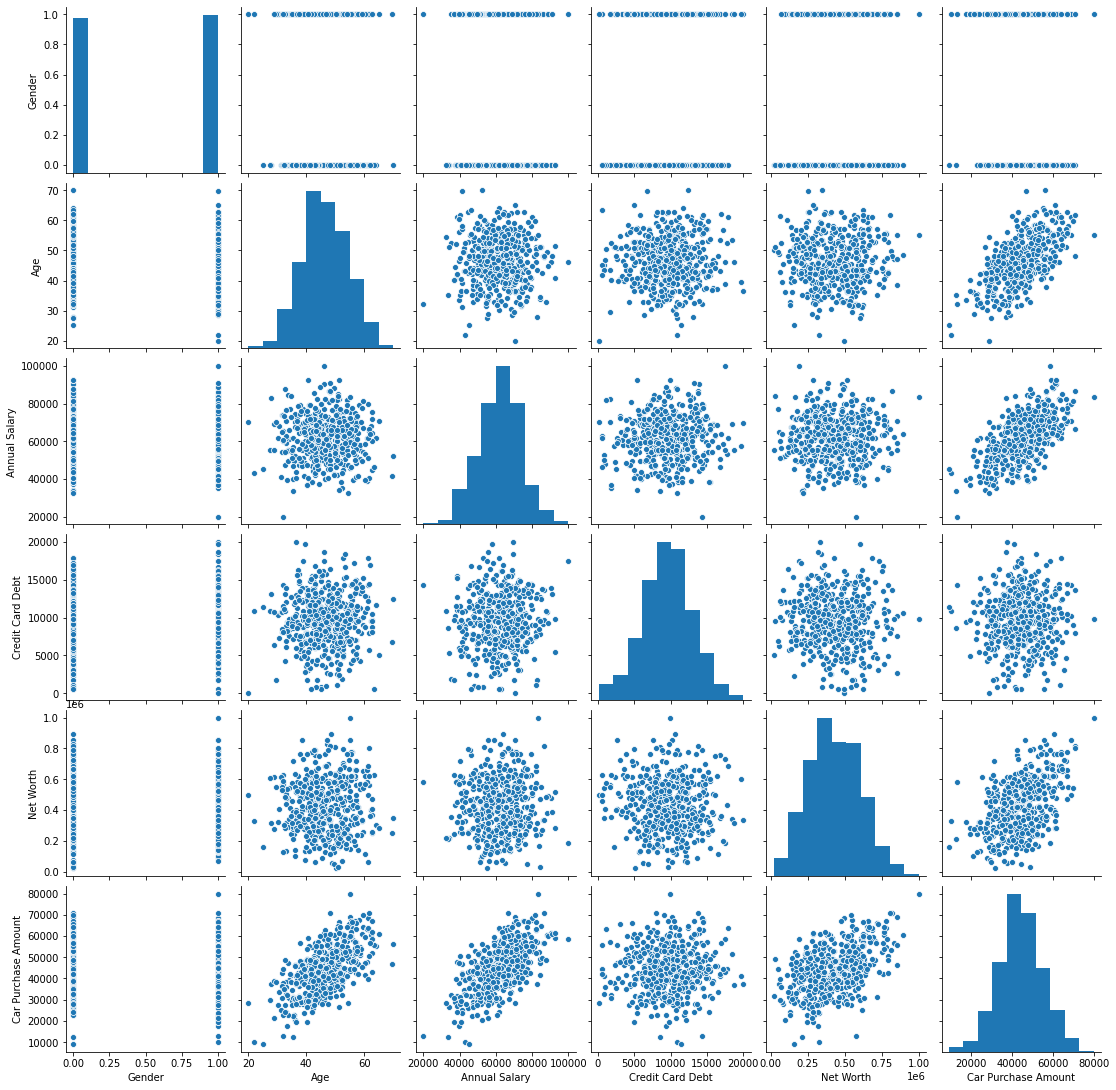

In [0]:
sns.pairplot(car_df)

# Preparing the Data for ANN, Data Cleaning

In [0]:
X = car_df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)

In [0]:
X

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


In [0]:
y = car_df['Car Purchase Amount']
y.shape

(500,)

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)

In [0]:
scaler_x.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [0]:
scaler_x.data_min_

array([    0.,    20., 20000.,   100., 20000.])

In [0]:
print(X_scaled)

[[0.         0.4370344  0.53515116 0.57836085 0.22342985]
 [0.         0.41741247 0.58308616 0.476028   0.52140195]
 [1.         0.46305795 0.42248189 0.55579674 0.63108896]
 ...
 [1.         0.67886994 0.61110973 0.52822145 0.75972584]
 [1.         0.78321017 0.37264988 0.69914746 0.3243129 ]
 [1.         0.53462305 0.51713347 0.46690159 0.45198622]]


In [0]:
X_scaled.shape

(500, 5)

In [0]:
y = y.values.reshape(-1,1)

In [0]:
y.shape

(500, 1)

In [0]:
y

array([[35321.45877],
       [45115.52566],
       [42925.70921],
       [67422.36313],
       [55915.46248],
       [56611.99784],
       [28925.70549],
       [47434.98265],
       [48013.6141 ],
       [38189.50601],
       [59045.51309],
       [42288.81046],
       [28700.0334 ],
       [49258.87571],
       [49510.03356],
       [53017.26723],
       [41814.72067],
       [43901.71244],
       [44633.99241],
       [54827.52403],
       [51130.95379],
       [43402.31525],
       [47240.86004],
       [46635.49432],
       [45078.40193],
       [44387.58412],
       [37161.55393],
       [49091.97185],
       [58350.31809],
       [43994.35972],
       [17584.56963],
       [44650.36073],
       [66363.89316],
       [53489.46214],
       [39810.34817],
       [51612.14311],
       [38978.67458],
       [10092.22509],
       [35928.52404],
       [54823.19221],
       [45805.67186],
       [41567.47033],
       [28031.20985],
       [27815.73813],
       [68678.4352 ],
       [68

In [0]:
scaler_y = MinMaxScaler()

y_scaled = scaler_y.fit_transform(y)

In [0]:
y_scaled

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

# Training the Model

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [0]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(Dense(25, input_dim=5, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                150       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [0]:
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=50,  verbose=1, validation_split=0.2)




Train on 300 samples, validate on 75 samples
Epoch 1/100





300/300 [==============================] - 1s 4ms/step - loss: 0.3927 - acc: 0.0033 - val_loss: 0.3163 - val_acc: 0.0000e+00
Epoch 2/100
300/300 [==============================] - 0s 78us/step - loss: 0.2621 - acc: 0.0033 - val_loss: 0.2012 - val_acc: 0.0000e+00
Epoch 3/100
300/300 [==============================] - 0s 83us/step - loss: 0.1644 - acc: 0.0033 - val_loss: 0.1159 - val_acc: 0.0000e+00
Epoch 4/100
300/300 [==============================] - 0s 87us/step - loss: 0.0924 - acc: 0.0033 - val_loss: 0.0566 - val_acc: 0.0000e+00
Epoch 5/100
300/300 [==============================] - 0s 81us/step - loss: 0.0452 - acc: 0.0067 - val_loss: 0.0244 - val_acc: 0.0000e+00
Epoch 6/100
300/300 [==============================] - 0s 80us/step - loss: 0.0232 - acc: 0.0067 - val_loss: 0.0158 - val_acc: 0.0000e+00
Epoch 7/100
300/300 [==============================] - 0s 74us/step - loss: 0.0190 - acc: 0.0067 - val_loss: 0.0175 - va

# Evaluating the Model

In [0]:
print(epochs_hist.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


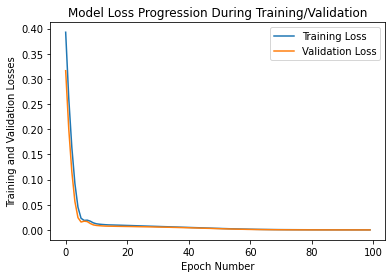

In [0]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

In [0]:
#gender, age, annual salary, credit card debt, net worth
x_test = np.array([[1,50,50000,10000,60000]])
y_predict = model.predict(x_test)
print('Expected Purchase Amount', y_predict)

X_test_sample = np.array([[0, 0.4370344,  0.53515116, 0.57836085, 0.22342985]])
y_predict_sample = model.predict(X_test_sample)
print('Expected Purchase Amount=', y_predict_sample)                             #scaled
y_predict_sample_orig = scaler_y.inverse_transform(y_predict_sample)
print('Expected Purchase Amount=', y_predict_sample_orig)                        #original

Expected Purchase Amount [[46886.074]]
Expected Purchase Amount= [[0.37414777]]
Expected Purchase Amount= [[35564.492]]
